MNIST 数据集是图像分类中广泛使用的数据集之一，单作为基准数据集太简单。使用更复杂的 Fashion-MNIST 数据集

MNIST 数据集是手写识别的数据集，较简单

In [1]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display() # 显示图片

通过内置函数下载并读取到内存中，其中测试数据集不参与模型训练，是在训练完成后进行测试，以判断模型的好坏

In [3]:
"""通过 ToTensor 实例将图像数据从 PIL 类型变成32位浮点数格式，
并除以 255 使所有像素的数值均在 0 到 1 之间"""
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root="./data", 
                                                train=True, # 代表下载的是训练数据集
                                                transform=trans, # 这里将下载的数据是 tensor，而不是图片
                                                download=True) #默认从网上下载，如果事先下载好就不用设置为 T，放在指定目录即可

mnist_test = torchvision.datasets.FashionMNIST(root="./data", 
                                                train=False, # 代表下载的是测试数据集
                                                transform=trans, 
                                                download=True)

len(mnist_train), len(mnist_test)

Using downloaded and verified file: ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz
Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw

Using downloaded and verified file: ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz
Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw

Using downloaded and verified file: ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz
Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw

Using downloaded and verified file: ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz
Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



(60000, 10000)

In [15]:
mnist_train[1][0].shape #一个 example 由 img 和 label(0-9) 组成，这里提取的是第一个 example 的 img 的形状

torch.Size([1, 28, 28])

两个可视化数据集的函数

In [48]:
def get_fashion_mnist_labels(labels):
    """输入一组标签值，返回一个标签值对应标签的列表"""
    text_labels = [
    't-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot'
    ]
    return [text_labels[int(i)] for i in labels]

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.2):
    """用于将图片画出来"""
    figsize = (num_cols *scale, num_rows * scale) #图像区域总大小
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten() # axes 其实就是图片区域，还未放数据上去
    for i, (ax, img) in enumerate (zip(axes, imgs)): #迭代器
        ax.axis('off') #去除坐标
        if torch.is_tensor(img):
            ax.imshow(img.numpy()) # 图片张量
        else:
            ax.imshow(img) # PIL图片
        if titles is not None:
            ax.set_title(titles[i])
    
            


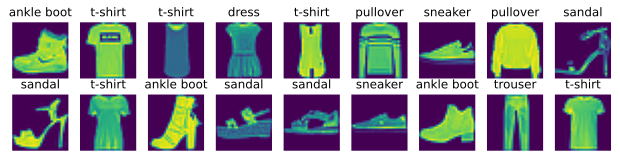

In [49]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18))) # X 是图片张量，y是标签
show_images(X.reshape(18, 28, 28), 2, 9, titles = get_fashion_mnist_labels(y))

这里测试读取数据的速度，读取速度是一个性能瓶颈

In [55]:
batch_size = 256

def get_dataloader_workers():
    """使用4个进程读取数据"""
    return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=get_dataloader_workers())

timer = d2l.Timer()
for X, y in train_iter:
    continue

f'{timer.stop():.2f} sec'

'7.37 sec'

以上都是做演示，即下载并加载数据集到内存并绘制，以下 `load_data_fashion_mnist` 函数也是下载数据集并加载到函数并提取小批量，如果数据集大小改变也可以进行 resize 操作

In [63]:
def load_data_fashion_mnist(batch_size, resize=None):
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(root="./data", 
                                                train=True, # 代表下载的是训练数据集
                                                transform=trans, # 这里将下载的数据是 tensor，而不是图片
                                                download=False) #默认从网上下载，如果事先下载好就不用设置为 T，放在指定目录即可

    mnist_test = torchvision.datasets.FashionMNIST(root="./data", 
                                                train=False, # 代表下载的是测试数据集
                                                transform=trans, 
                                                download=False)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=True, num_workers=get_dataloader_workers()))